# 04 - Logistic Regression 

This notebook provides an overview of logistic regression, a fundamental algorithm for binary classification problems. I will begin with a mathematical explanation of how logistic regression works demonstrate the practical implementation of logistic regression.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

%config InlineBackend.figure_format = 'retina'

In [7]:
data = pd.read_csv('/Users/konansul/Downloads/Social_Network_Ads.csv')

## 1. Exploratory Data Analysis
This dataset simulates a binary classification problem, where the goal is to predict whether a user will purchase a product (`1`) or not (`0`) based on the following features: `Gender`,  `Age`,  `EstimatedSalary`. There is also a `User ID` column, which serves only as a unique identifier for each user. Since it contains no meaningful pattern or signal related to purchasing behavior, we will drop this column.

In [8]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [10]:
data['User ID'].value_counts().value_counts()

count
1    400
Name: count, dtype: int64

In [14]:
data = data.drop('User ID', axis = 1)

### Mathematical Representation

Let’s denote the dataset as a feature matrix $X$ and a target vector $y$. We define the feature matrix $X$ in $\mathbb{R}^{m \times n}$ \) as:
$$
X =
\begin{bmatrix}
1 & x_{11} & x_{12} & x_{13} \\
1 & x_{21} & x_{22} & x_{23} \\
\vdots & \vdots & \vdots & \vdots \\
1 & x_{400,1} & x_{400,2} & x_{400,3}
\end{bmatrix}
\in \mathbb{R}^{400 \times 4}
$$

where: $ m = 400 $, because 400 rows, so 400 number of users, $x_{i1}$ is the encoded gender (0 or 1), $x_{i2}$ is the age, $x_{i3}$ is the estimated salary, and the first column is all 1s (intercept term). The target output vector $y$ in $\{0, 1\}^m$ is:

$$
y =
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_m
\end{bmatrix}
\in \{0,1\}^{400}
$$
Since the output variable is discrete and takes only two values, this is a classification problem specifically, binary logistic regression.
The logistic model seeks to fit a hypothesis of the form:

$$
h_\theta(x) = \sigma(a_0 x_0 + a_1 x_1 + a_2 x_2 + a_3 x_3)
$$

Where:
- $ \sigma(z) = \frac{1}{1 + e^{-z}} $ is the sigmoid function
- $ \theta = [a_0, a_1, a_2, a_3] $ are the model parameters

The model outputs a probability between 0 and 1, which is interpreted as the likelihood that a given user will make a purchase.

In [11]:
data['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In the dataset the gender column is written as male and female but I will change it to 0 and 1 because machine learning models work better with numerical values than with text or object types this makes the data easier to process and improves model performance.

In [13]:
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})

The `pandas.describe()` function gives essential statistical information about the dataset. It shows the mean, standard deviation, minimum and maximum values, as well as the 25th, 50th, and 75th percentiles. This helps us understand the distribution of the data and identify possible outliers or irregularities. It is a quick way to get an overview of each numerical column.

In [16]:
data.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


Now we can perform the correlation analysis and see which features are most related to the target value `purchased`. From the heatmap below we can see that the age column has a strong correlation - 0.62 which means that older people tend to purchase more often than younger ones also the estimated salary has a correlation around 0.36 showing that people with higher income are more likely to buy compared to those with lower salary. This helps to separate the data into two main classes older people with high salary and younger people with low salary.

<Axes: >

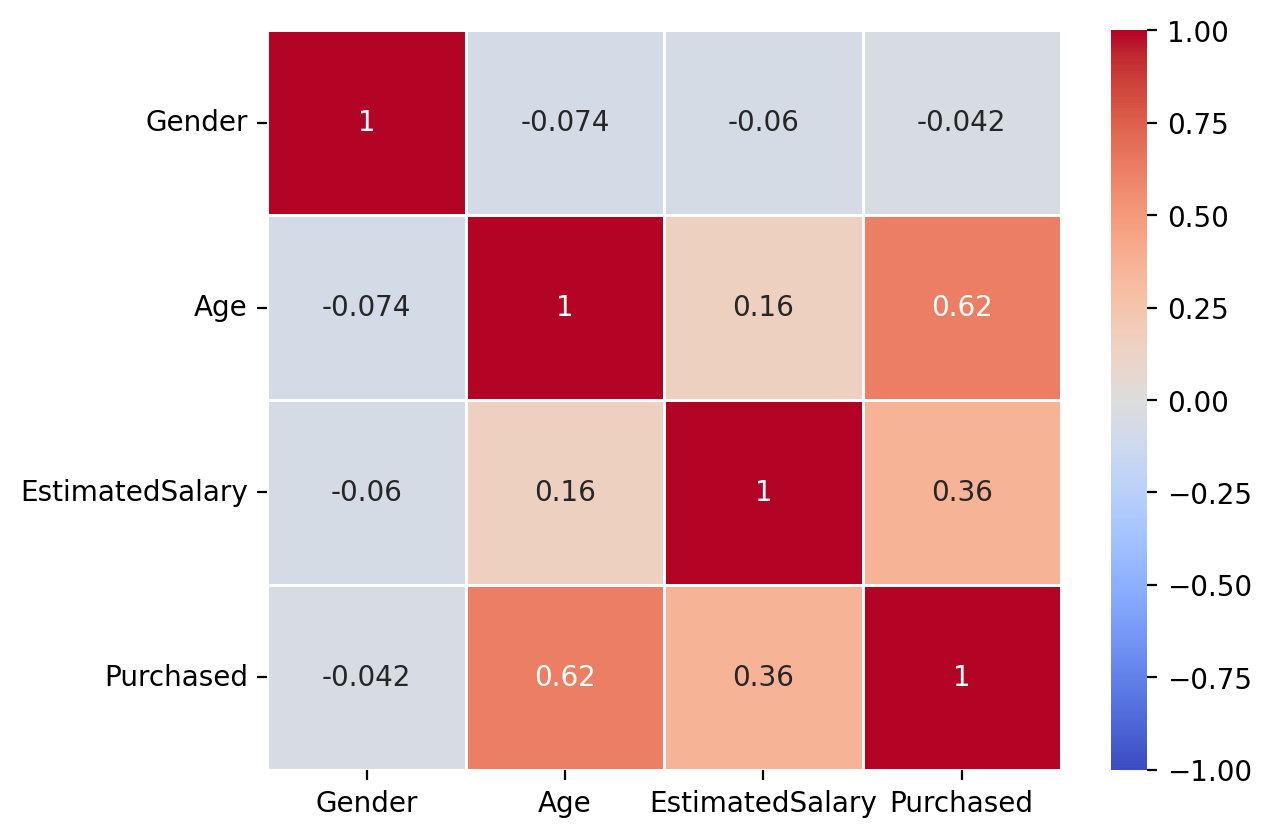

In [15]:
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm', linewidths = 0.5, vmin = -1, vmax = 1)

These assumptions can also be confirmed by the boxplots where we use the `Purchased` column as the hue. In the first boxplot we can see that the yellow box corresponding to people who purchased is positioned higher which means they tend to be older than those who didn't purchase. In the second plot we also see that people who purchased usually have higher estimated salaries.

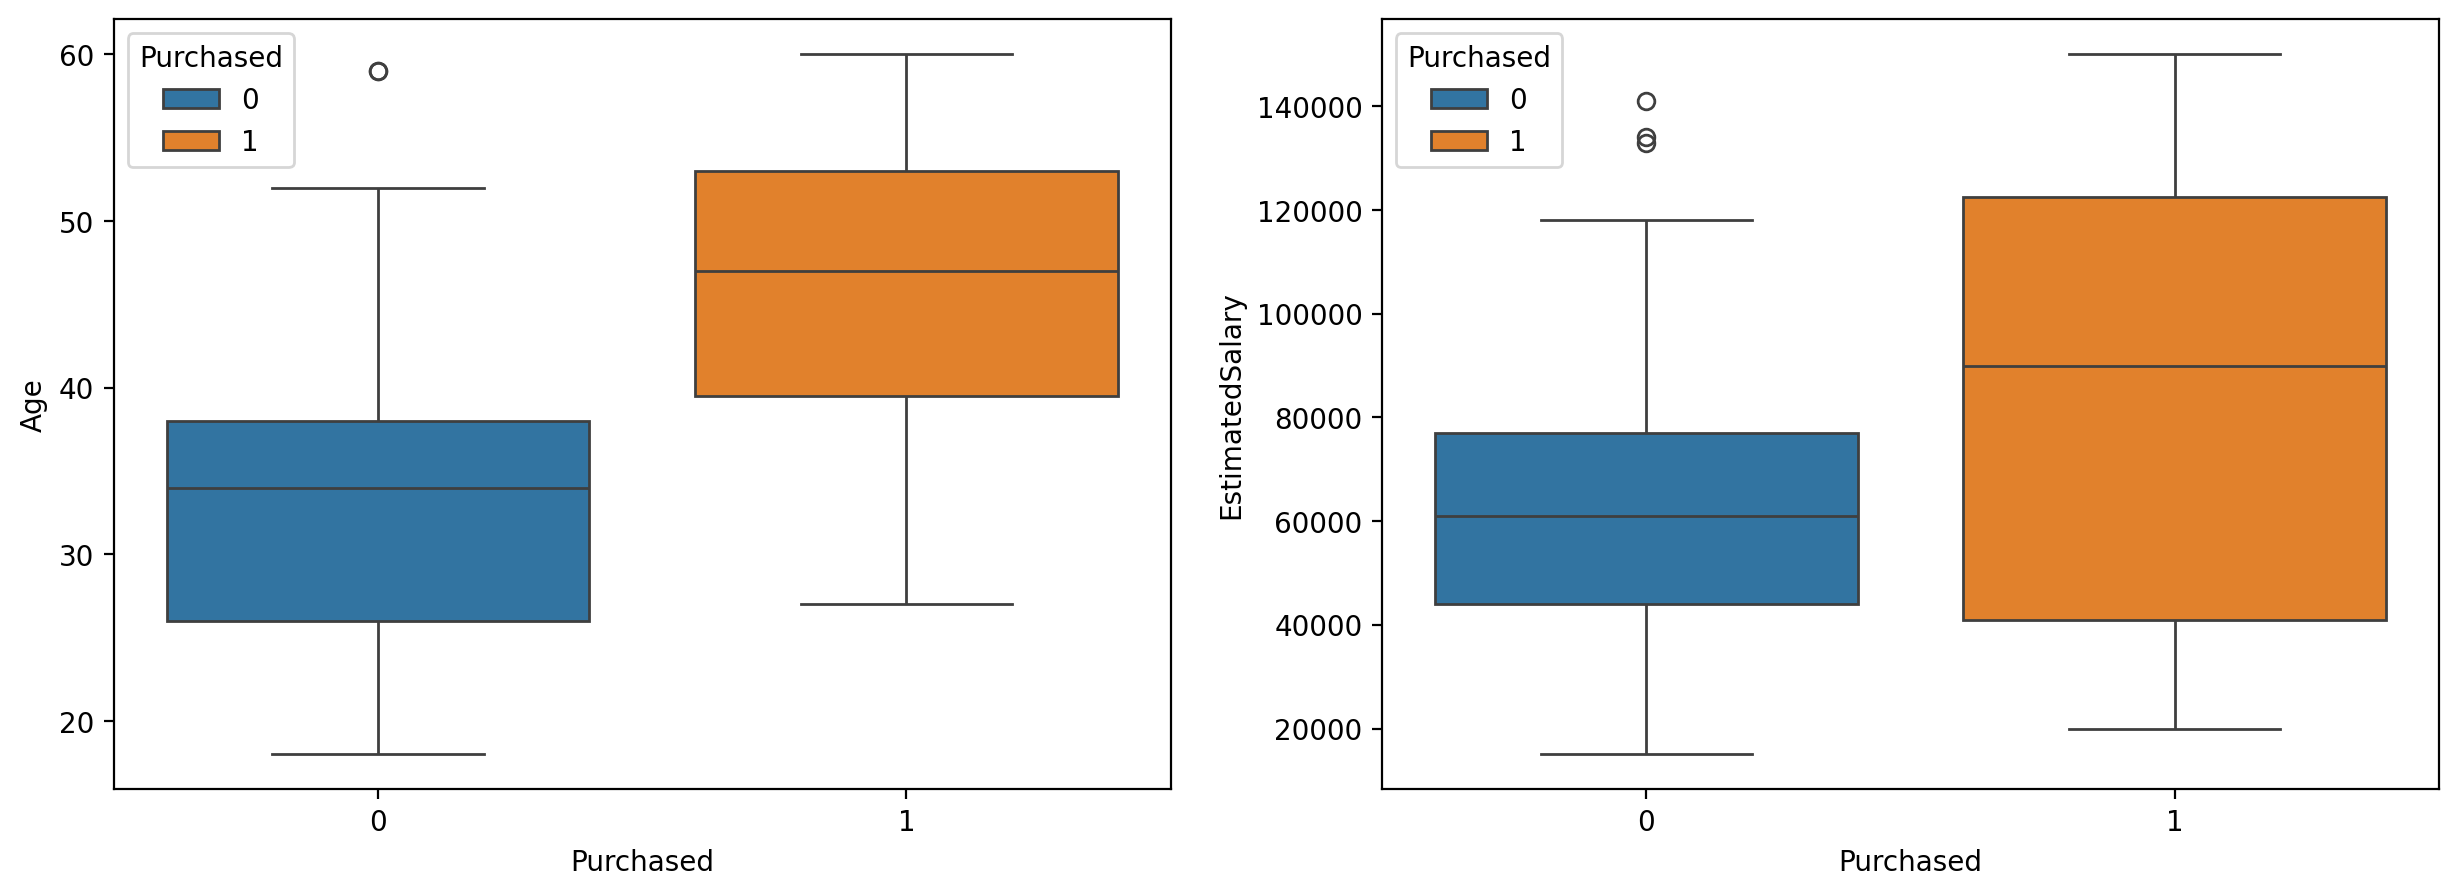

In [43]:
features = ['Age', 'EstimatedSalary']
plt.figure(figsize=(15, 5))

for i, feature in enumerate(features):
    plt.subplot(1, 2, i + 1) 
    sns.boxplot(x = data['Purchased'], y = feature, data = data, hue='Purchased')
plt.show()

Although it is important to analyze the balance of the classes. We can perform this by using the countplot to count the number of 0s and 1s in the target column you can see that there are 257 users who did not purchase and 143 who did purchase this means the classes are not perfectly balanced but still close enough to be considered almost balanced so we can continue without applying any resampling techniques.

In [12]:
data['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

<Axes: xlabel='Purchased', ylabel='count'>

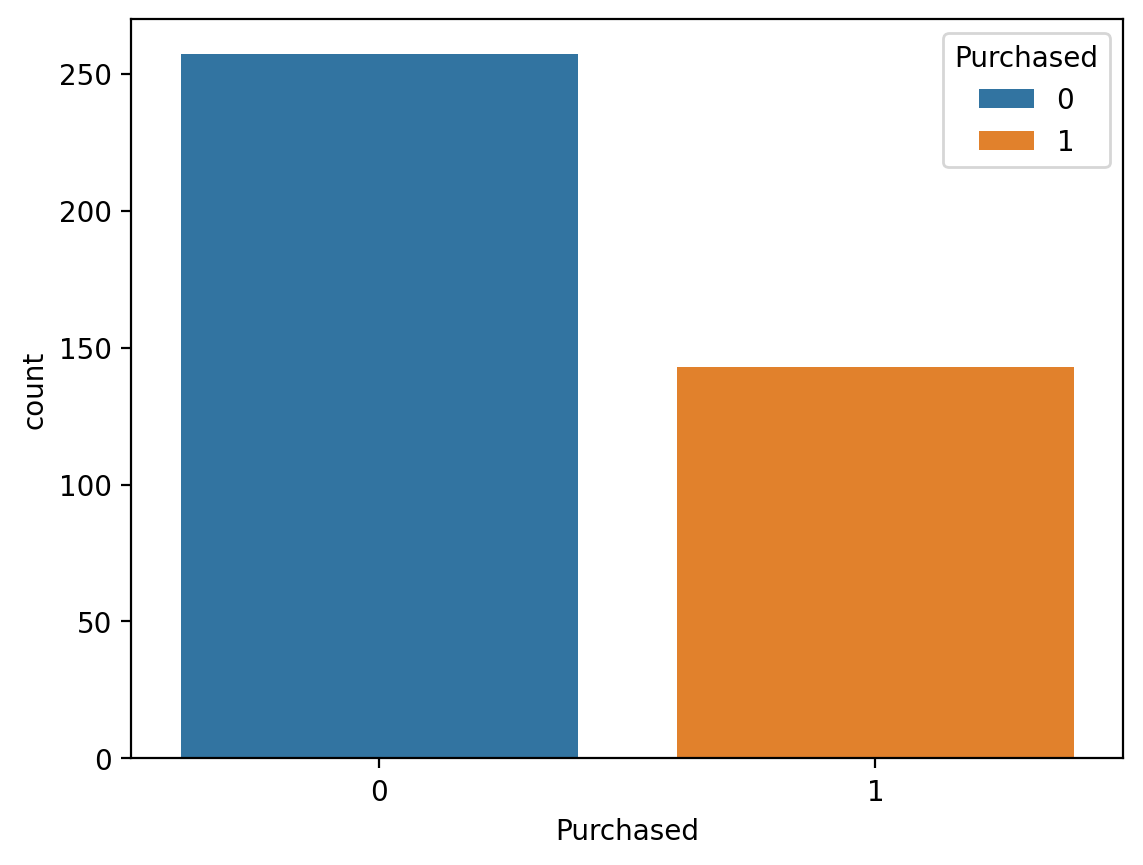

In [17]:
sns.countplot(x = 'Purchased', data = data, hue = 'Purchased')

From the scatterplot below we can clearly see how the data points are grouped based on their features the classification is visually noticeable as the two classes are separated into distinct regions. This helps us understand how well the features like age and salary contribute to dividing people into those who purchase and those who do not. Using the Plotly library I also created a 3D visualization since we have two input features plus the target this helps us see how the classes are distributed in space the 3D scatter plot.

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

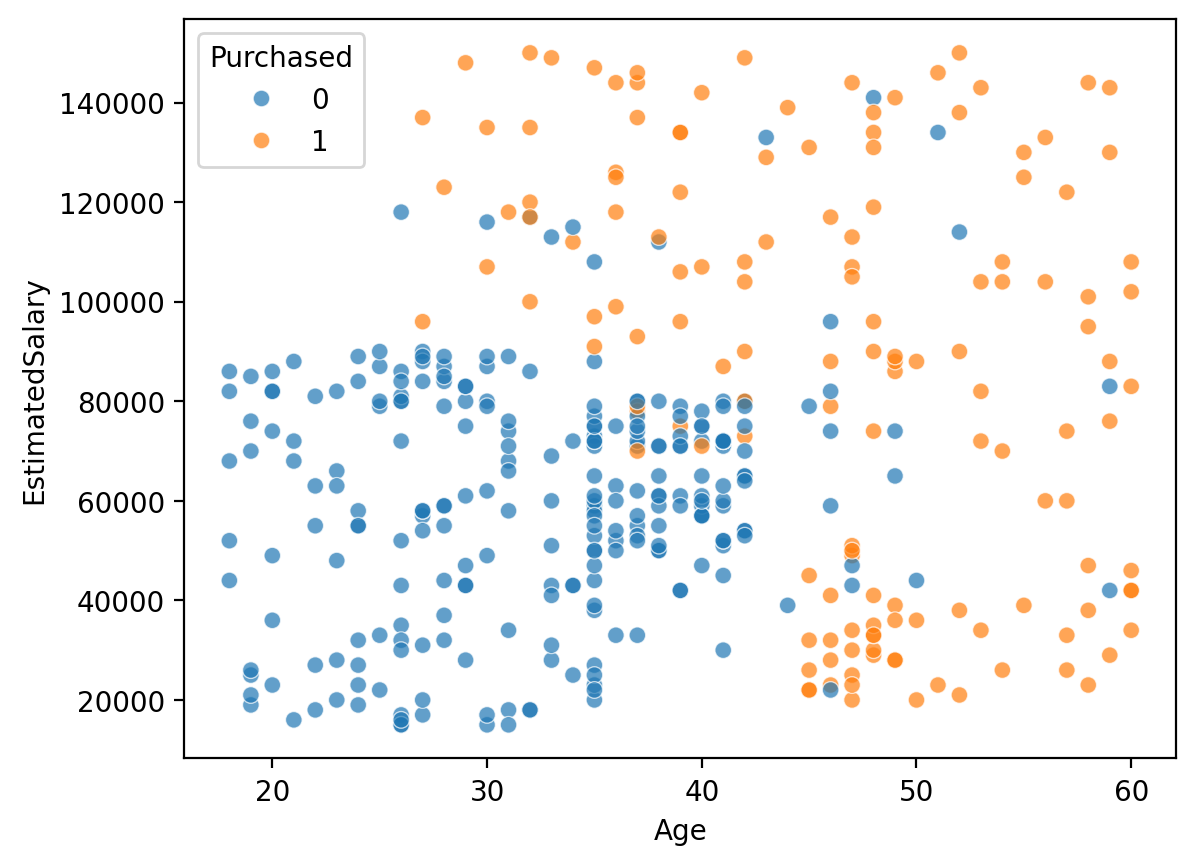

In [18]:
sns.scatterplot(x = 'Age', y = 'EstimatedSalary', data = data, hue = 'Purchased', alpha = 0.7)

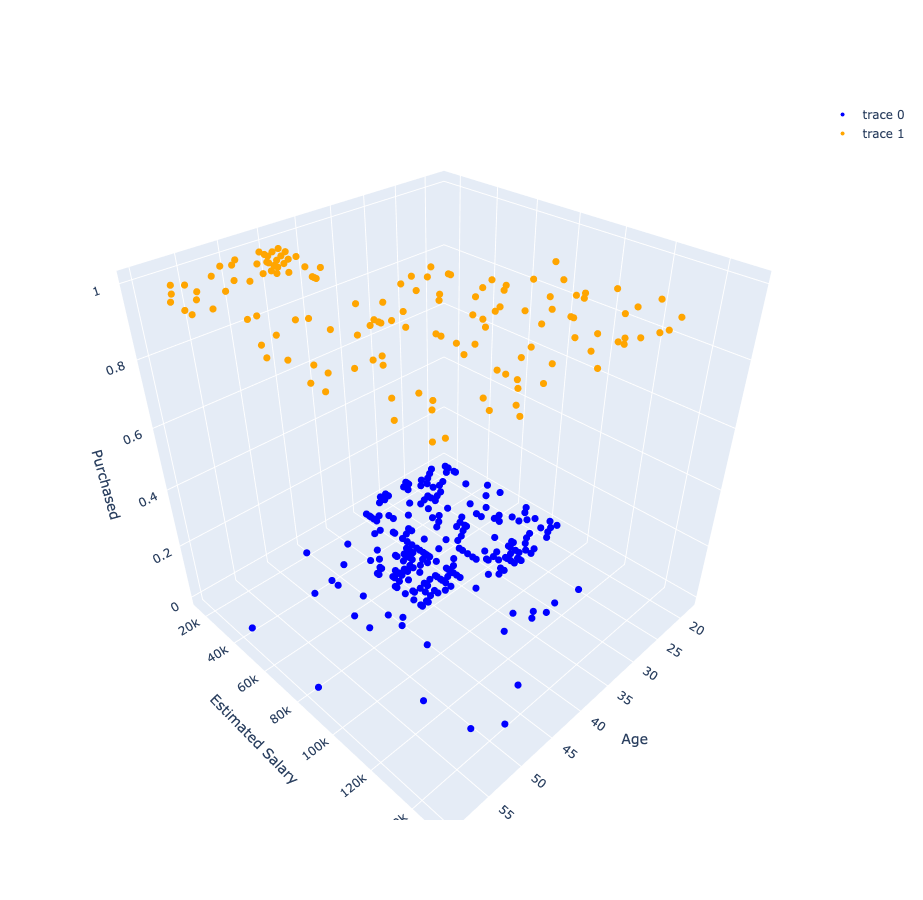

In [46]:
x0 = np.array(data['Age'])
x1 = np.array(data['EstimatedSalary'])
y = np.array(data['Purchased'])

fig = go.Figure()
    
for label, color in zip([0, 1], ['blue', 'orange']):
    mask = y == label
    fig.add_trace(go.Scatter3d(
        x = x0[mask], y = x1[mask], z = y[mask], mode = 'markers', marker = dict(size = 4, color = color),
    ))

fig.update_layout(
    width = 1000,
    height = 900,
    scene = dict(
        xaxis_title = 'Age',
        yaxis_title = 'Estimated Salary',
        zaxis_title = 'Purchased'
    )
)
fig.show()

Obviously the pair plot is something that can be used at the beginning of the analysis but since our dataset has only a few numerical features it is also fine to use it at the end. The pairplot shows the relationships between all pairs of numerical features in the dataset, so we can also analyze the spread or overlap between classes which helps us understand how well the data is separable for a classification problem.

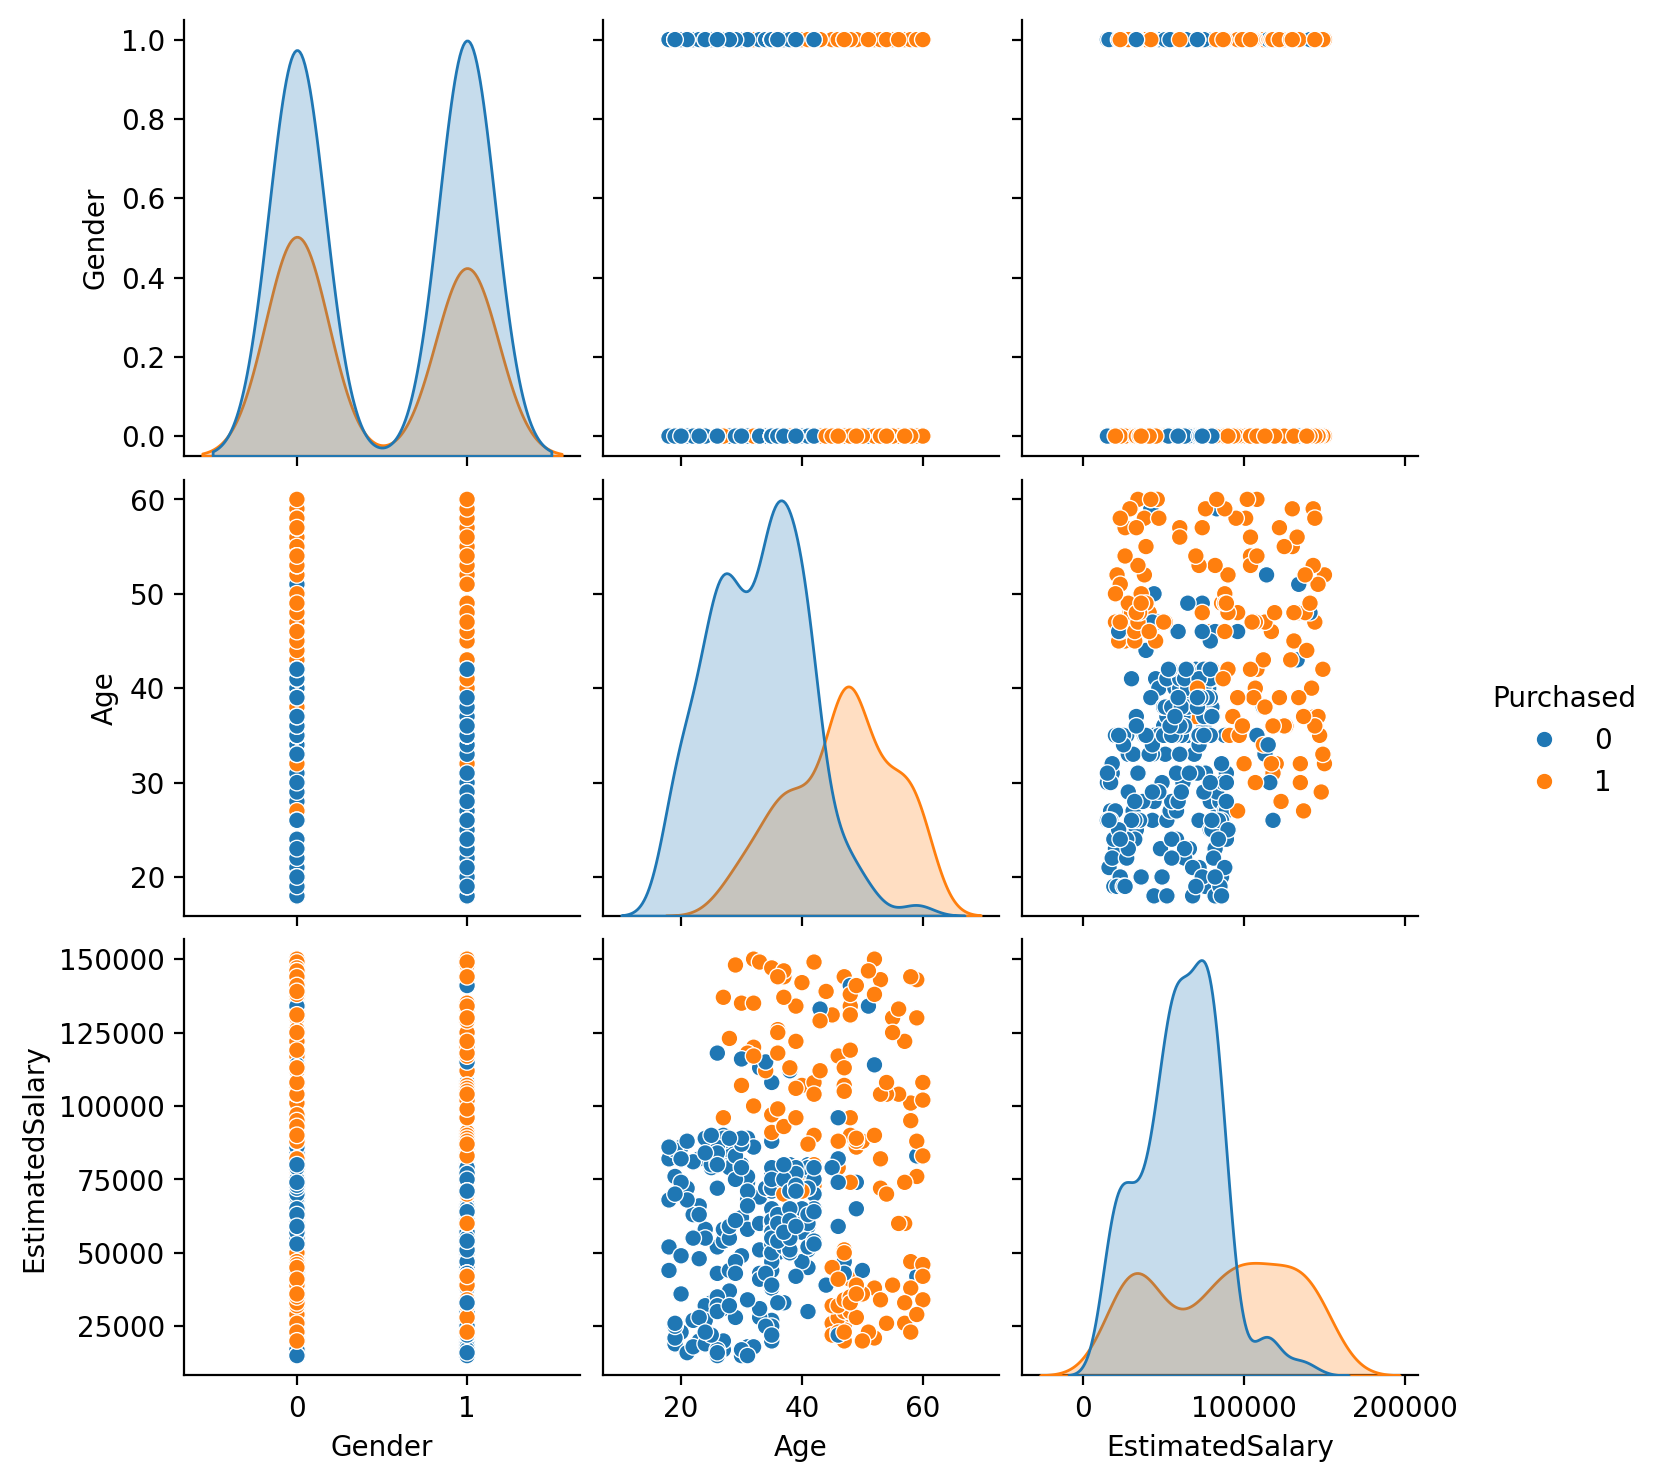

In [21]:
sns.pairplot(data = data, hue = 'Purchased')

## 2. Mathematical Explanation
Logistic regression can be thought of as the sigmoid of linear regression we take a linear combination of the inputs and pass it through a sigmoid function to get a probability value between 0 and 1 the general form of the hypothesis is:

$$
p = \frac{1}{1 + e^{-(a_0x_0 + a_1x_1 + \dots + a_nx_n)}}
$$

Here $p$ is the predicted probability that the output is 1 for a given input. Logistic regression does not directly say that an observation belongs to class 0 or class 1 instead it gives the probability that an observation belongs to class 1 this means the model outputs a value $p$ which is the probability of being in class 1 and $(1 - p)$ is the probability of being in class 0 this is why logistic regression is a probabilistic model and this is also where the idea of maximum likelihood comes from we try to choose the model parameters that maximize the probability of observing the actual labels in the training data. So to train the model we use the method of maximum likelihood, that is, to choose the parameters that make the observed data most likely the likelihood function is:

$$
\ell = \prod_{i=1}^{n} p^{y^{(i)}} (1 - p)^{1 - y^{(i)}}
$$

This works because when  $y^{(i)} = 1$, the term becomes $p$, and when  $y^{(i)} = 0$, it becomes  $(1 - p)$. We apply the logarithms to make the computation easier using the rules:

$$
\ln(ab) = \ln a + \ln b \\
$$
$$
\ln(a^b) = b \cdot \ln a
$$

So the log-likelihood becomes:

$$
\ln \ell = \sum_{i=1}^{n} \left[ y^{(i)} \ln p + (1 - y^{(i)}) \ln(1 - p) \right]
$$

Since we want to use gradient-based optimization methods which minimize a function instead of maximizing we take the negative of the log-likelihood:

$$
\mathcal{L} = -\sum_{i=1}^{n} \left[ y^{(i)} \ln p + (1 - y^{(i)}) \ln(1 - p) \right]
$$

And finally we average it by dividing by \( n \) to get the logloss function or binary cross-entropy:

$$
\mathcal{L} = -\frac{1}{n} \sum_{i=1}^{n} \left[ y^{(i)} \ln p + (1 - y^{(i)}) \ln(1 - p) \right]
$$

This is the loss function we minimize when training a logistic regression model.

## 3.  Model Training and Evaluation

In [22]:
X = data.drop('Purchased', axis = 1)

In [23]:
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [24]:
y = data['Purchased']

In [25]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

I will use a scaler to normalize the data so that all features are on a similar scale. This helps many machine learning algorithms (like gradient descent-based models or distance-based models) perform better and converge faster. Without scaling, features with larger values can dominate the model and lead to poor results.

In [27]:
scaler = StandardScaler()

In [28]:
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [29]:
log_model = LogisticRegression()

In [30]:
log_model.fit(scaled_x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [31]:
log_model.coef_, log_model.intercept_

(array([[0.17269673, 2.21325511, 1.11555455]]), array([-1.06432129]))

In [32]:
y_pred = log_model.predict(scaled_x_test)

As you can see, the prediction vector contains only 0s and 1s, representing the predicted classes. However, by using predict_proba, we can obtain the actual probability scores for each class for example, values like 0.49 for the first class and 0.51 for the second class. These probabilities give us more information about how confident the model is in its predictions, rather than just a hard decision.

In [33]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0])

In [34]:
y_pred_probability = log_model.predict_proba(scaled_x_test)

In [35]:
y_pred_probability[:10]

array([[0.68393647, 0.31606353],
       [0.63516862, 0.36483138],
       [0.94698874, 0.05301126],
       [0.66235491, 0.33764509],
       [0.92820576, 0.07179424],
       [0.24294281, 0.75705719],
       [0.75928988, 0.24071012],
       [0.74122368, 0.25877632],
       [0.72953151, 0.27046849],
       [0.97844995, 0.02155005]])

## 4. Evaluation metrics for classification tasks

 A confusion matrix is a table that shows the performance of a classification model by comparing actual and predicted labels.
For binary classification, it looks like:

|                       | **Actual Positive** | **Actual Negative** |
|-----------------------|---------------------|---------------------|
| **Predicted Positive** | True Positive (TP)  | False Positive (FP) ← Type I Error |
| **Predicted Negative** | False Negative (FN) ← Type II Error | True Negative (TN)  |

Each metric helps answer a specific question about model performance, they are especially useful when classes are imbalanced, or when different types of errors (false positives vs. false negatives) have different costs.

**Accuracy** – The proportion of correctly predicted instances (both positives and negatives). Accuracy answers to the question: "How often is the classifier correct overall?".

  $$
  \text{Accuracy} = \frac{TP + TN}{TP + FP + FN + TN}
  $$

**Precision** – The proportion of predicted positives that are actually positive. "When the model predicts positive, how often is it right?".
  $$
  \text{Precision} = \frac{TP}{TP + FP}
  $$
**Recall** – (also called sensitivity or true positive rate), is the proportion of actual positives that were correctly identified. "Out of all actual positives, how many did the model correctly identify?"
  $$
  \text{Recall} = \frac{TP}{TP + FN}
  $$

**F1 Score** – The harmonic mean of precision and recall. It balances both metrics: "What is the balance between precision and recall?". > If either precision or recall is zero, then the F1 score will also be zero. This means the model completely fails either to correctly identify any positive cases (recall = 0) or to make any accurate positive predictions (precision = 0), indicating poor performance in that aspect.
  $$
  \text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
  $$

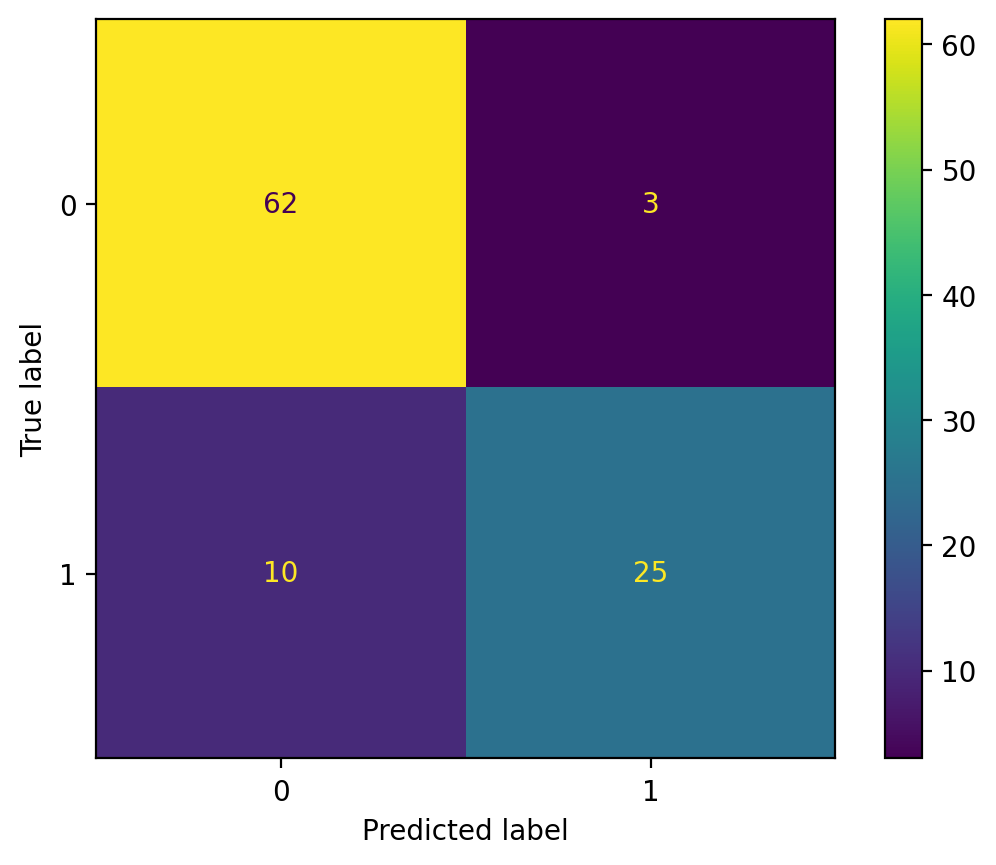

In [36]:
ConfusionMatrixDisplay.from_estimator(log_model, scaled_x_test, y_test)

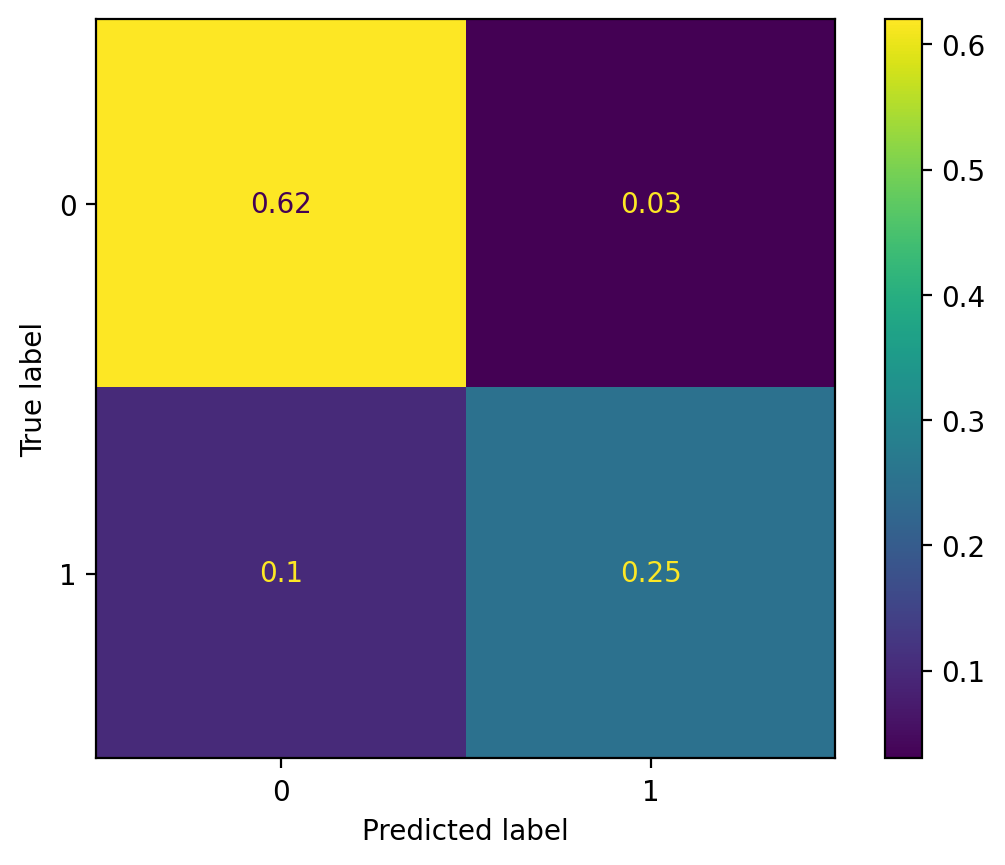

In [37]:
ConfusionMatrixDisplay.from_estimator(log_model, scaled_x_test, y_test, normalize = 'all')

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91        65
           1       0.89      0.71      0.79        35

    accuracy                           0.87       100
   macro avg       0.88      0.83      0.85       100
weighted avg       0.87      0.87      0.87       100



In [39]:
precision_score(y_test, y_pred)

0.8928571428571429

In [40]:
recall_score(y_test, y_pred)

0.7142857142857143

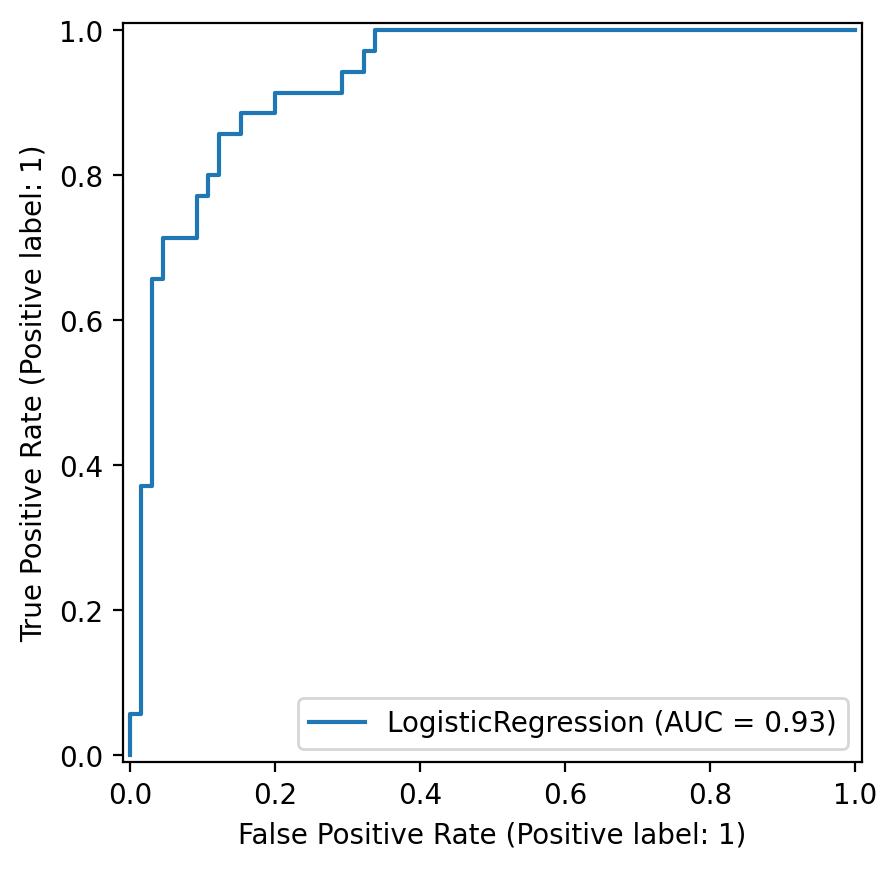

In [41]:
RocCurveDisplay.from_estimator(log_model, scaled_x_test, y_test)

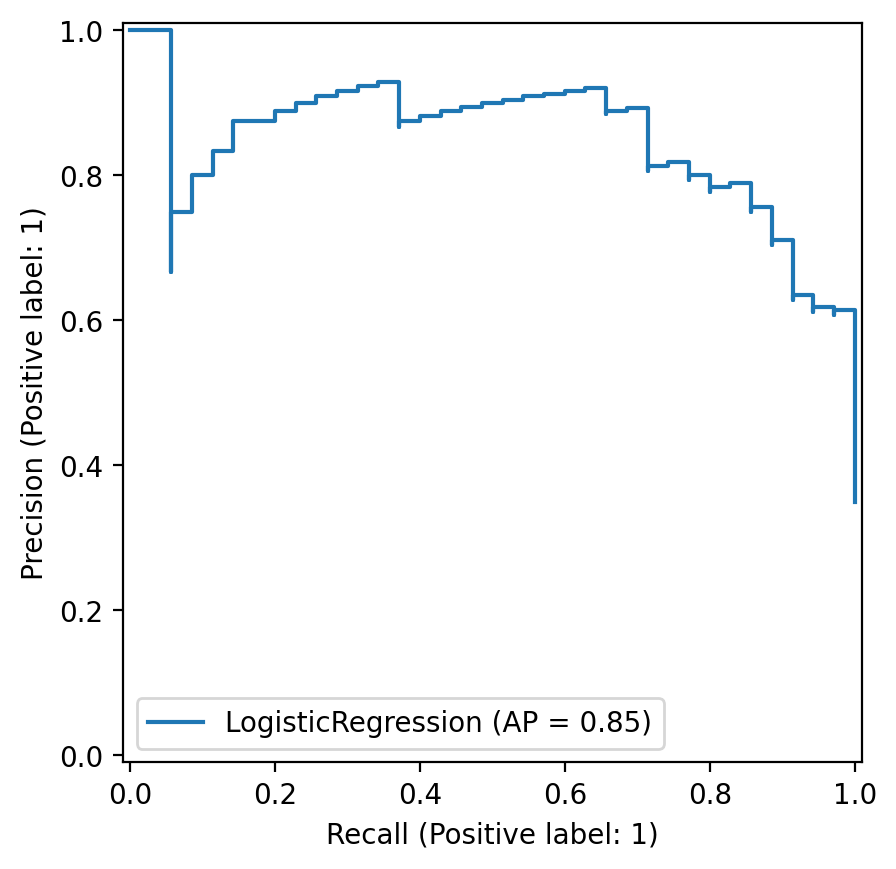

In [42]:
PrecisionRecallDisplay.from_estimator(log_model, scaled_x_test, y_test)